In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print(os.listdir("./input"))


['test1', 'test1.zip', 'train', 'train.zip']


In [3]:
physical_devices = tf.config.list_physical_devices("GPU")
print(physical_devices)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB

In [3]:
filenames = os.listdir("./input/train/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

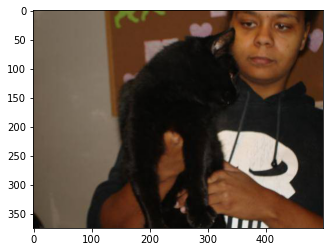

In [6]:
sample = random.choice(filenames)
image = load_img("./input/train/train/"+sample)
plt.imshow(image)

In [16]:
param1 = {
    'loss' : 'categorical_crossentropy',
    'optimizer' : 'rmsprop',
    'lr' : 0.001,
    'activation' : 'relu',
    'ratioTTV' : (0.75,0.15,0.10),
    'epoch' : 25,
    'batch_size': 20
}

param2 = {
    'loss' : 'categorical_crossentropy',
    'optimizer' : 'rmsprop',
    'lr' : 0.001,
    'activation' : 'relu',
    'ratioTTV' : (0.75,0.15,0.10),
    'epoch' : 25,
    'batch_size': 20
} # Pas de différence mais on ajoute un layer sur le model

param3 = {
    'loss' : 'categorical_crossentropy',
    'optimizer' : 'rmsprop',
    'lr' : 0.001,
    'activation' : 'relu',
    'ratioTTV' : (0.75,0.15,0.10),
    'epoch' : 50, # on teste avec plus d'époques
    'batch_size': 20
}


param4 = {
    'loss' : 'binary_crossentropy', # on change la fonction de loss
    'optimizer' : 'rmsprop',
    'lr' : 0.001,
    'activation' : 'relu',
    'ratioTTV' : (0.75,0.15,0.10),
    'epoch' : 50,
    'batch_size': 20
}

param5 = {
    'loss' : 'binary_crossentropy',
    'optimizer' : 'adam',  # on change l'optimizer
    'lr' : 0.001,
    'activation' : 'relu',
    'ratioTTV' : (0.75,0.15,0.10), # Ratio train,validation,test
    'epoch' : 50,
    'batch_size': 15
} #Meilleur résultat avec ces paramètres

param6 = {
    'loss' : 'binary_crossentropy', 
    'optimizer' : 'adam',
    'lr' : 0.005, # on change le learning rate
    'activation' : 'relu',
    'ratioTTV' : (0.75,0.15,0.10), # Ratio train,validation,test
    'epoch' : 50,
    'batch_size': 15
} 

In [36]:


model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation=param1['activation'], input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), activation=param1['activation']))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, (3, 3), activation=param1['activation']))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512, activation=param1['activation']))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model1.compile(loss=param1['loss'], optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=param1['lr'],
    name="RMSprop"
), metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_5 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 61, 61, 64)      

In [9]:

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation=param2['activation'], input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation=param2['activation']))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation=param2['activation']))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#On ajoute un layer
model2.add(Conv2D(256, (3, 3), activation=param2['activation']))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation=param2['activation']))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model2.compile(loss=param2['loss'], optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=param2['lr'],
    name="RMSprop"
)
, metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 61, 61, 64)      

In [10]:

model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation=param3['activation'], input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), activation=param3['activation']))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3, 3), activation=param3['activation']))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(256, (3, 3), activation=param3['activation']))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(512, activation=param3['activation']))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model3.compile(loss=param3['loss'], optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=param3['lr'],
    name="RMSprop"
)
, metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_9 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_10 (Bat  (None, 61, 61, 64)      

In [11]:

model4 = Sequential()

model4.add(Conv2D(32, (3, 3), activation=param4['activation'], input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(64, (3, 3), activation=param4['activation']))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(128, (3, 3), activation=param4['activation']))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(256, (3, 3), activation=param4['activation']))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(512, activation=param4['activation']))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model4.compile(loss=param4['loss'], optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=param4['lr'],
    name="RMSprop"
)
, metrics=['accuracy'])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_14 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_15 (Bat  (None, 61, 61, 64)      

In [8]:

model5 = Sequential() #Meilleur résultat avec ce modèle

model5.add(Conv2D(32, (3, 3), activation=param5['activation'], input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(64, (3, 3), activation=param5['activation']))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(128, (3, 3), activation=param5['activation']))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(256, (3, 3), activation=param5['activation']))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(512, activation=param5['activation']))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model5.compile(loss=param5['loss'], optimizer=tf.keras.optimizers.Adam(
    learning_rate=param5['lr']
)
, metrics=['accuracy'])

model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [17]:

model6 = Sequential() #Meilleur résultat avec ce modèle

model6.add(Conv2D(32, (3, 3), activation=param6['activation'], input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))

model6.add(Conv2D(64, (3, 3), activation=param6['activation']))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))

model6.add(Conv2D(128, (3, 3), activation=param6['activation']))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))

model6.add(Conv2D(256, (3, 3), activation=param6['activation']))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))

model6.add(Flatten())
model6.add(Dense(512, activation=param6['activation']))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))
model6.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model6.compile(loss=param6['loss'], optimizer=tf.keras.optimizers.Adam(
    learning_rate=param6['lr']
)
, metrics=['accuracy'])

model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_5 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 61, 61, 64)      

In [18]:
earlystop = EarlyStopping(patience=10)

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=10, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.001)

In [20]:
callbacks = [earlystop, learning_rate_reduction]

In [21]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 
print(df)

           filename category
0         cat.0.jpg      cat
1         cat.1.jpg      cat
2        cat.10.jpg      cat
3       cat.100.jpg      cat
4      cat.1000.jpg      cat
...             ...      ...
24995  dog.9995.jpg      dog
24996  dog.9996.jpg      dog
24997  dog.9997.jpg      dog
24998  dog.9998.jpg      dog
24999  dog.9999.jpg      dog

[25000 rows x 2 columns]


In [22]:
train_ratio = param1['ratioTTV'][0]
validation_ratio = param1['ratioTTV'][1]
test_ratio = param1['ratioTTV'][2]
train_df, test_df = train_test_split(df, test_size=1 - train_ratio, random_state=42)
validation_df, test_df = train_test_split(test_df, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
validate_df = validation_df.reset_index(drop=True)
print(train_df)
print(test_df)
print(validation_df)

            filename category
0       cat.7152.jpg      cat
1       dog.9289.jpg      dog
2        dog.441.jpg      dog
3       dog.1958.jpg      dog
4      cat.10041.jpg      cat
...              ...      ...
17494   dog.6916.jpg      dog
17495     cat.36.jpg      cat
17496  cat.10771.jpg      cat
17497   dog.1713.jpg      dog
17498   dog.8788.jpg      dog

[17499 rows x 2 columns]
           filename category
0       dog.568.jpg      dog
1      cat.4512.jpg      cat
2      cat.8237.jpg      cat
3      dog.7742.jpg      dog
4      dog.3320.jpg      dog
...             ...      ...
2996   dog.7458.jpg      dog
2997  cat.12272.jpg      cat
2998  cat.10034.jpg      cat
2999   dog.4356.jpg      dog
3000  dog.10491.jpg      dog

[3001 rows x 2 columns]
            filename category
21528   dog.6874.jpg      dog
15657    dog.159.jpg      dog
14006  dog.11352.jpg      dog
14341  dog.11654.jpg      dog
10275   cat.7997.jpg      cat
...              ...      ...
4678    cat.2959.jpg      cat
2

In [23]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]


In [24]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./input/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=param5['batch_size']
)

Found 17499 validated image filenames belonging to 2 classes.


In [25]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./input/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=param5['batch_size'],shuffle=False
)

Found 4500 validated image filenames belonging to 2 classes.


In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    "./input/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=param5['batch_size'],shuffle=False
)

Found 3001 validated image filenames belonging to 2 classes.


In [72]:
history = model1.fit(
    train_generator, 
    epochs=param1['epoch'],
    validation_data=validation_generator,
    validation_steps=total_validate//param1['batch_size'],
    steps_per_epoch=total_train//param1['batch_size'],
    callbacks=callbacks
)

Epoch 1/25
874/874 [==============================] - 92s 106ms/step - loss: 0.3151 - accuracy: 0.8646 - val_loss: 0.2473 - val_accuracy: 0.9052 - lr: 0.0010
Epoch 2/25
874/874 [==============================] - 90s 103ms/step - loss: 0.3288 - accuracy: 0.8589 - val_loss: 0.2771 - val_accuracy: 0.8844 - lr: 0.0010
Epoch 3/25
874/874 [==============================] - 91s 104ms/step - loss: 0.3135 - accuracy: 0.8657 - val_loss: 0.3350 - val_accuracy: 0.8587 - lr: 0.0010
Epoch 4/25
874/874 [==============================] - 91s 104ms/step - loss: 0.3141 - accuracy: 0.8656 - val_loss: 0.4477 - val_accuracy: 0.8323 - lr: 0.0010
Epoch 5/25
874/874 [==============================] - 91s 104ms/step - loss: 0.3166 - accuracy: 0.8658 - val_loss: 0.2506 - val_accuracy: 0.9022 - lr: 0.0010
Epoch 6/25
874/874 [==============================] - 90s 103ms/step - loss: 0.3149 - accuracy: 0.8690 - val_loss: 0.2699 - val_accuracy: 0.8978 - lr: 0.0010
Epoch 7/25
874/874 [==============================] 

In [76]:


history2 = model2.fit(
    train_generator, 
    epochs=param2['epoch'],
    validation_data=validation_generator,
    validation_steps=total_validate//param2['batch_size']e,
    steps_per_epoch=total_train//param2['batch_size'],
    callbacks=callbacks
)

Epoch 1/25
874/874 [==============================] - 140s 155ms/step - loss: 0.7693 - accuracy: 0.6334 - val_loss: 0.5833 - val_accuracy: 0.7038 - lr: 0.0010
Epoch 2/25
874/874 [==============================] - 195s 223ms/step - loss: 0.5382 - accuracy: 0.7327 - val_loss: 0.5692 - val_accuracy: 0.7365 - lr: 0.0010
Epoch 3/25
874/874 [==============================] - 174s 199ms/step - loss: 0.4757 - accuracy: 0.7746 - val_loss: 0.5191 - val_accuracy: 0.7788 - lr: 0.0010
Epoch 4/25
874/874 [==============================] - 149s 170ms/step - loss: 0.4298 - accuracy: 0.8041 - val_loss: 0.4973 - val_accuracy: 0.7577 - lr: 0.0010
Epoch 5/25
874/874 [==============================] - 136s 155ms/step - loss: 0.4003 - accuracy: 0.8219 - val_loss: 0.3401 - val_accuracy: 0.8481 - lr: 0.0010
Epoch 6/25
874/874 [==============================] - 125s 143ms/step - loss: 0.3706 - accuracy: 0.8381 - val_loss: 0.3470 - val_accuracy: 0.8519 - lr: 0.0010
Epoch 7/25
874/874 [==========================

In [82]:
history3 = model3.fit(
    train_generator, 
    epochs=param3['epoch'],
    validation_data=validation_generator,
    validation_steps=total_validate//param3['batch_size'],
    steps_per_epoch=total_train//param3['batch_size'],
    callbacks=callbacks
)

Epoch 1/50
874/874 [==============================] - 120s 134ms/step - loss: 0.7754 - accuracy: 0.6219 - val_loss: 0.6042 - val_accuracy: 0.6827 - lr: 0.0010
Epoch 2/50
874/874 [==============================] - 121s 138ms/step - loss: 0.5472 - accuracy: 0.7282 - val_loss: 0.5109 - val_accuracy: 0.7308 - lr: 0.0010
Epoch 3/50
874/874 [==============================] - 116s 133ms/step - loss: 0.4840 - accuracy: 0.7708 - val_loss: 0.4235 - val_accuracy: 0.8096 - lr: 0.0010
Epoch 4/50
874/874 [==============================] - 118s 134ms/step - loss: 0.4265 - accuracy: 0.8069 - val_loss: 0.3969 - val_accuracy: 0.8404 - lr: 0.0010
Epoch 5/50
874/874 [==============================] - 117s 134ms/step - loss: 0.3980 - accuracy: 0.8237 - val_loss: 0.3291 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 6/50
874/874 [==============================] - 117s 133ms/step - loss: 0.3569 - accuracy: 0.8436 - val_loss: 0.4248 - val_accuracy: 0.8308 - lr: 0.0010
Epoch 7/50
874/874 [==========================

In [36]:
history4 = model4.fit(
    train_generator, 
    epochs=param4['epoch'],
    validation_data=validation_generator,
    validation_steps=total_validate//param4['batch_size'],
    steps_per_epoch=total_train//param4['batch_size'],
    callbacks=callbacks
)

Epoch 1/50
874/874 [==============================] - 124s 141ms/step - loss: 0.1897 - accuracy: 0.9261 - val_loss: 0.1754 - val_accuracy: 0.9231 - lr: 0.0010
Epoch 2/50
874/874 [==============================] - 124s 142ms/step - loss: 0.1909 - accuracy: 0.9241 - val_loss: 0.1872 - val_accuracy: 0.9423 - lr: 0.0010
Epoch 3/50
874/874 [==============================] - 123s 141ms/step - loss: 0.1935 - accuracy: 0.9227 - val_loss: 0.1599 - val_accuracy: 0.9365 - lr: 0.0010
Epoch 4/50
874/874 [==============================] - 151s 172ms/step - loss: 0.1938 - accuracy: 0.9202 - val_loss: 0.1482 - val_accuracy: 0.9481 - lr: 0.0010
Epoch 5/50
874/874 [==============================] - 142s 163ms/step - loss: 0.1977 - accuracy: 0.9201 - val_loss: 0.2025 - val_accuracy: 0.9173 - lr: 0.0010
Epoch 6/50
874/874 [==============================] - 122s 139ms/step - loss: 0.1934 - accuracy: 0.9210 - val_loss: 0.1678 - val_accuracy: 0.9423 - lr: 0.0010
Epoch 7/50
874/874 [==========================

In [216]:
history5 = model5.fit(
    train_generator, 
    epochs=param5['epoch'],
    validation_data=validation_generator,
    validation_steps=total_validate//param5['batch_size'],
    steps_per_epoch=total_train//param5['batch_size'],
    callbacks=callbacks
)

Epoch 1/50
1166/1166 [==============================] - 157s 135ms/step - loss: 0.2434 - accuracy: 0.8994 - val_loss: 0.2287 - val_accuracy: 0.9053 - lr: 0.0010
Epoch 2/50
1166/1166 [==============================] - 138s 118ms/step - loss: 0.2309 - accuracy: 0.9047 - val_loss: 0.1471 - val_accuracy: 0.9422 - lr: 0.0010
Epoch 3/50
1166/1166 [==============================] - 129s 110ms/step - loss: 0.2192 - accuracy: 0.9113 - val_loss: 0.1687 - val_accuracy: 0.9342 - lr: 0.0010
Epoch 4/50
1166/1166 [==============================] - 115s 98ms/step - loss: 0.2281 - accuracy: 0.9053 - val_loss: 0.1529 - val_accuracy: 0.9398 - lr: 0.0010
Epoch 5/50
1166/1166 [==============================] - 115s 99ms/step - loss: 0.2184 - accuracy: 0.9101 - val_loss: 0.1496 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 6/50
1166/1166 [==============================] - 115s 99ms/step - loss: 0.2335 - accuracy: 0.9031 - val_loss: 0.1403 - val_accuracy: 0.9460 - lr: 0.0010
Epoch 7/50
1166/1166 [===============

In [27]:
history6 = model6.fit(
    train_generator, loss: 0.2005 - accuracy: 0.9202 - val_loss: 0.1355 - val_accuracy: 0.9460 - lr: 0.0010
    epochs=param6['epoch'],
    validation_data=validation_generator,
    validation_steps=total_validate//param6['batch_size'],
    steps_per_epoch=total_train//param6['batch_size'],
    callbacks=callbacks
)

Epoch 1/50
1166/1166 [==============================] - 146s 124ms/step - loss: 0.7598 - accuracy: 0.5705 - val_loss: 0.7649 - val_accuracy: 0.5367 - lr: 0.0050
Epoch 2/50
1166/1166 [==============================] - 111s 95ms/step - loss: 0.6314 - accuracy: 0.6521 - val_loss: 0.6188 - val_accuracy: 0.6802 - lr: 0.0050
Epoch 3/50
1166/1166 [==============================] - 148s 127ms/step - loss: 0.5871 - accuracy: 0.6915 - val_loss: 0.5364 - val_accuracy: 0.7273 - lr: 0.0050
Epoch 4/50
1166/1166 [==============================] - 116s 100ms/step - loss: 0.5658 - accuracy: 0.7073 - val_loss: 0.5424 - val_accuracy: 0.7209 - lr: 0.0050
Epoch 5/50
1166/1166 [==============================] - 116s 99ms/step - loss: 0.5482 - accuracy: 0.7237 - val_loss: 0.6029 - val_accuracy: 0.6904 - lr: 0.0050
Epoch 6/50
1166/1166 [==============================] - 116s 100ms/step - loss: 0.5252 - accuracy: 0.7423 - val_loss: 0.4719 - val_accuracy: 0.7718 - lr: 0.0050
Epoch 7/50
1166/1166 [==============

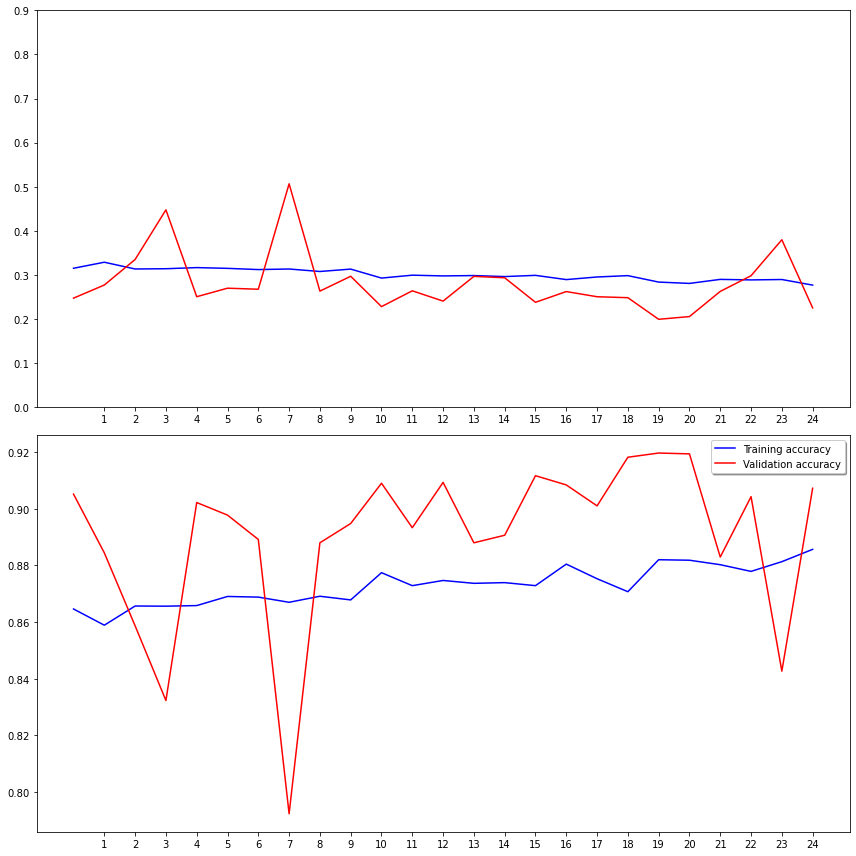

In [73]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, param1['epoch'], 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, param1['epoch'], 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

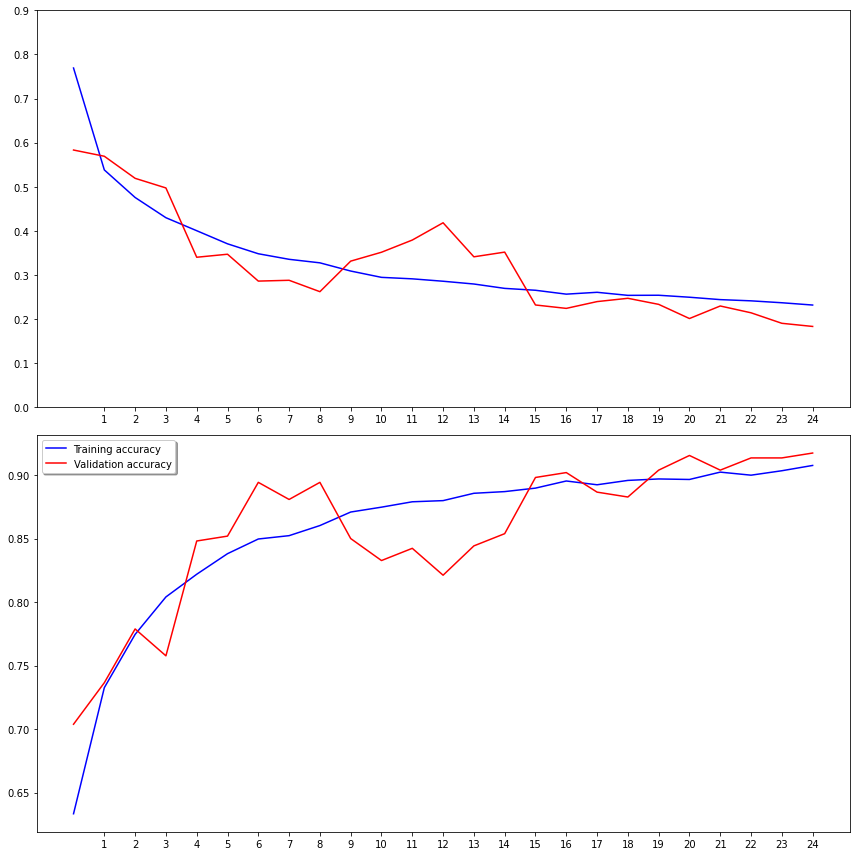

In [77]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history2.history['loss'], color='b', label="Training loss")
ax1.plot(history2.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, param2['epoch'], 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history2.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history2.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, param2['epoch'], 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

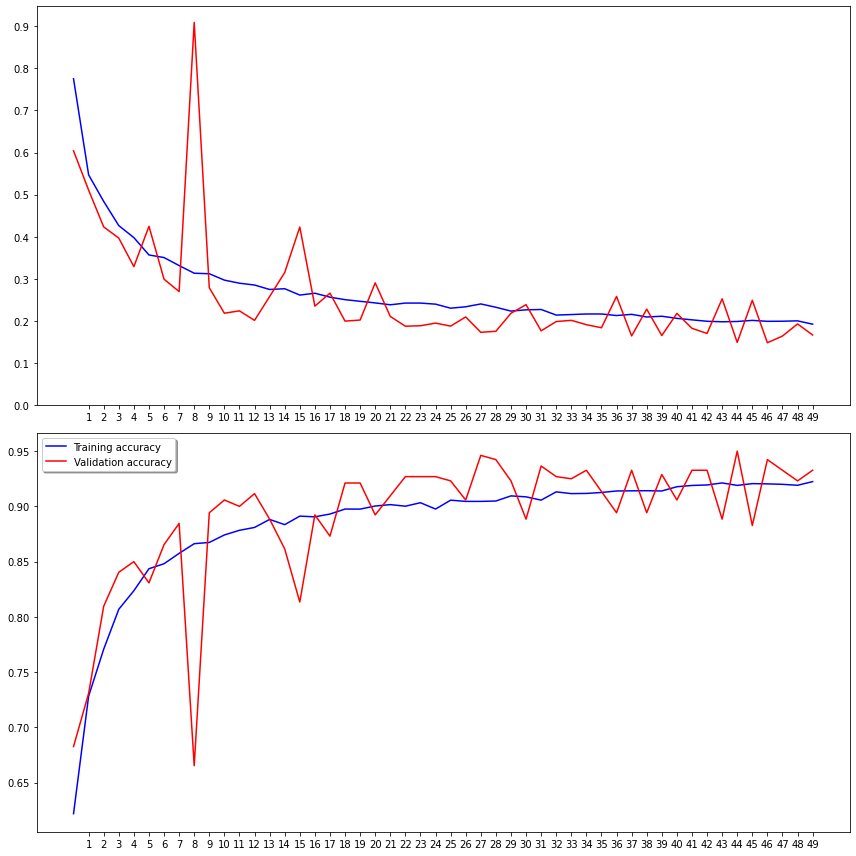

In [83]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history3.history['loss'], color='b', label="Training loss")
ax1.plot(history3.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, param3['epoch'], 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history3.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history3.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, param3['epoch'], 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

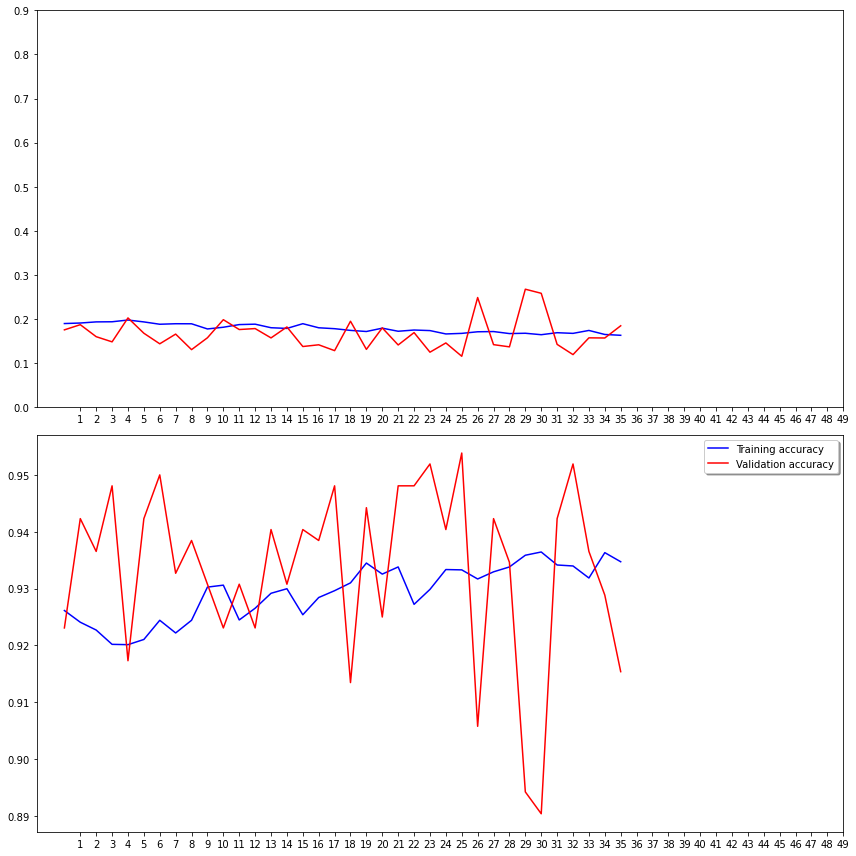

In [37]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history4.history['loss'], color='b', label="Training loss")
ax1.plot(history4.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, param4['epoch'], 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history4.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history4.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, param4['epoch'], 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

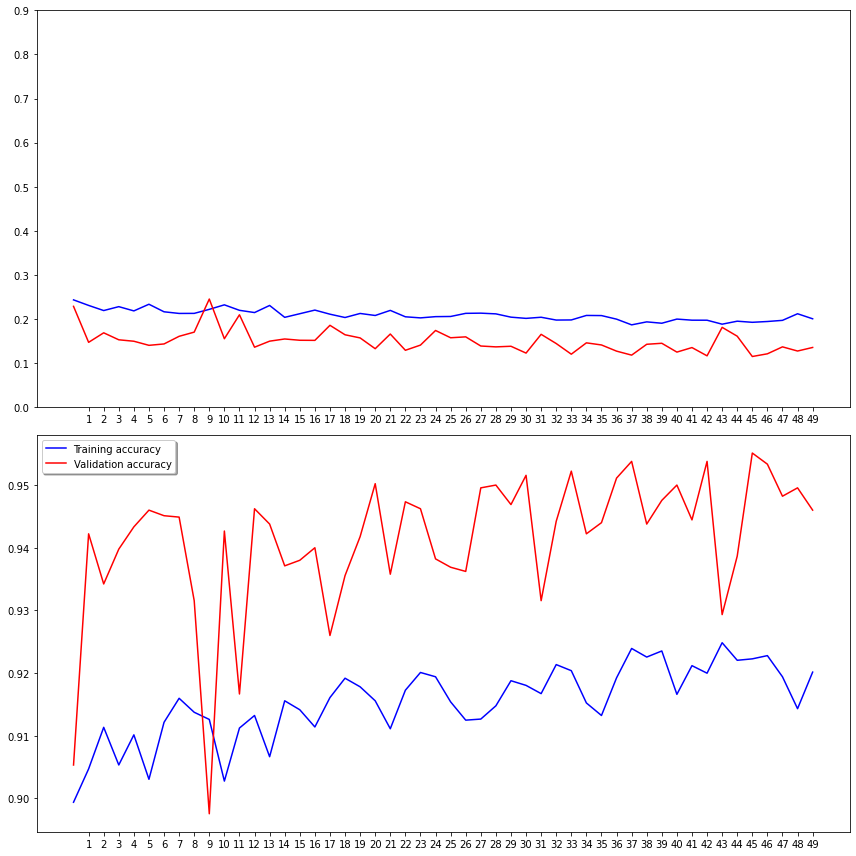

In [217]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history5.history['loss'], color='b', label="Training loss")
ax1.plot(history5.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, param5['epoch'], 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history5.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history5.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, param5['epoch'], 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

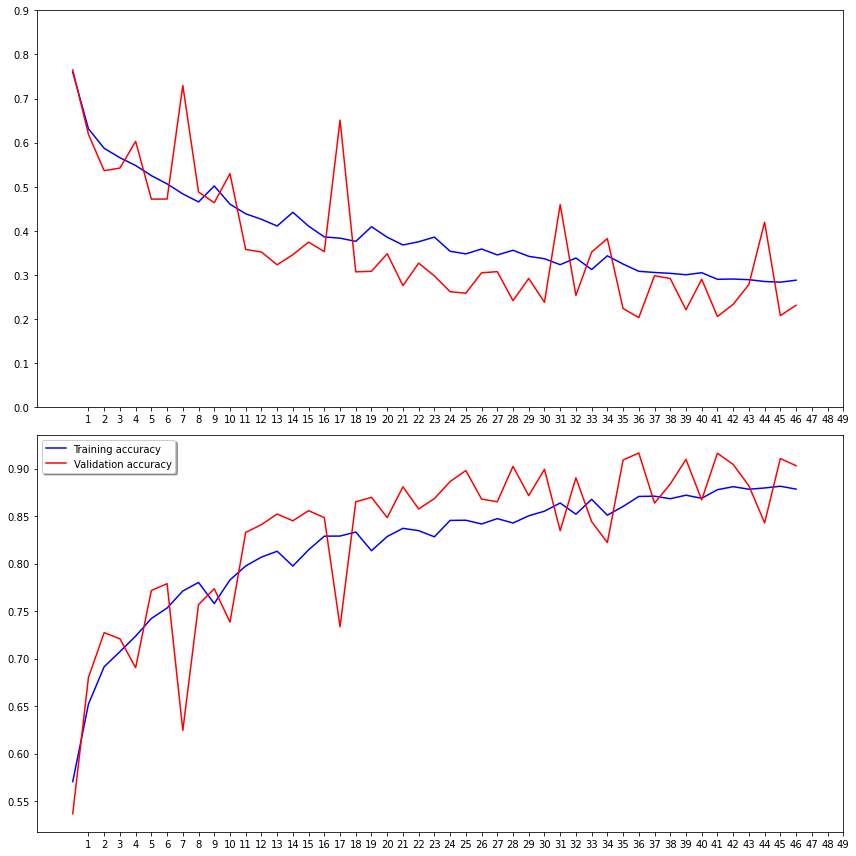

In [28]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history6.history['loss'], color='b', label="Training loss")
ax1.plot(history6.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, param6['epoch'], 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history6.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history6.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, param6['epoch'], 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [218]:
nb_samples = test_df.shape[0]
predict = model5.predict(test_generator,callbacks=callbacks,batch_size=param5['batch_size'])


201/201 [==============================] - 8s 42ms/step


In [152]:
test_labels = to_categorical(test_generator.classes, 2)
print(test_labels)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [224]:
(test_eval_loss, test_eval_accuracy) = model5.evaluate(  
  test_generator, batch_size=param5['batch_size'], verbose=1)

201/201 [==============================] - 8s 40ms/step - loss: 0.1398 - accuracy: 0.9444


In [221]:
test_df['prediction'] = np.argmax(predict, axis=-1)

In [222]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['prediction'] = test_df['prediction'].replace(label_map)

In [223]:
print(test_df)

           filename category prediction
0       dog.568.jpg      dog        dog
1      cat.4512.jpg      cat        cat
2      cat.8237.jpg      cat        cat
3      dog.7742.jpg      dog        dog
4      dog.3320.jpg      dog        dog
...             ...      ...        ...
2996   dog.7458.jpg      dog        cat
2997  cat.12272.jpg      cat        dog
2998  cat.10034.jpg      cat        cat
2999   dog.4356.jpg      dog        dog
3000  dog.10491.jpg      dog        dog

[3001 rows x 3 columns]


In [225]:
test_df['prediction'] = test_df['prediction'].replace({ 'dog': 1, 'cat': 0 })
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

In [228]:
cm = confusion_matrix(test_df['category'], test_df['prediction'], labels=[0, 1])

In [229]:
print("Accuracy:",accuracy_score(test_df['category'],test_df['prediction']))

Accuracy: 0.9443518827057648


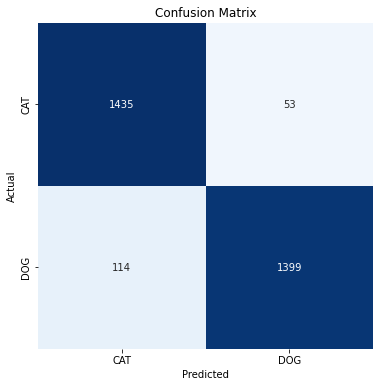

In [231]:


plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

